In [3]:
%pylab inline
import numpy as np
from scipy import optimize
from utils import img_utils

Populating the interactive namespace from numpy and matplotlib


In [2]:
reload(img_utils)

<module 'utils.img_utils' from 'utils/img_utils.pyc'>

# Ejemplo de prueba

In [78]:
def rosen(x):
    """The Rosenbrock function"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

def xcuad(x):
    return np.sum(x**2)+3*x[0]-x[1]

In [79]:
#x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
x0 = np.array([1.3, 0.7])
res = minimize(xcuad, x0, method='nelder-mead',
                options={'xtol': 1e-8, 'disp': True})
res.x, xcuad(res.x)

Optimization terminated successfully.
         Current function value: -2.500000
         Iterations: 81
         Function evaluations: 153


(array([-1.50000002,  0.5       ]), -2.5)

In [91]:
def graf_slice(func, focus, yline, step=0.1, rad=2):
    xs = np.arange(focus[1]-rad,focus[1]+rad, step)
    xss = np.array([[focus[0], x ] for x in xs])
    ys = [func(x) for x in xss]
    plt.stem(xs,ys)
    plt.axhline(y=yline)
    return plt
    #plt.ylim(-3,1)
    #print res.x, '->', minimum

[-1.50000002  0.5       ] -> <ufunc 'minimum'>


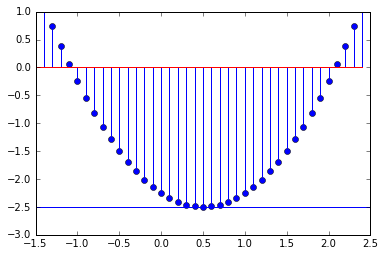

In [81]:
minimun = xcuad(res.x)
xs = np.arange(res.x[1]-2,res.x[1]+2,0.1)
xss = np.array([[res.x[0],x] for x in xs])
ys = [xcuad(x) for x in xss]
plt.stem(xs,ys)
plt.axhline(y=minimun)
plt.ylim(-3,1)
print res.x, '->', minimum

## BFGS

In [82]:
def rosen_der(x):
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    der = np.zeros_like(x)
    der[1:-1] = 200*(xm-xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1-xm)
    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[-1] = 200*(x[-1]-x[-2]**2)
    return der


In [83]:
res = minimize(rosen, x0, method='BFGS', jac=rosen_der,
                options={'disp': True})
res.x, rosen(res.x)



Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 40
         Function evaluations: 57
         Gradient evaluations: 57


(array([ 1.,  1.]), 1.6975190593873629e-22)

## Constrained minimization of multivariate scalar functions

In [84]:
def func(x, sign=1.0):
    """ Objective function """
    return sign*(2*x[0]*x[1] + 2*x[0] - x[0]**2 - 2*x[1]**2)

def func_deriv(x, sign=1.0):
    """ Derivative of objective function """
    dfdx0 = sign*(-2*x[0] + 2*x[1] + 2)
    dfdx1 = sign*(2*x[0] - 4*x[1])
    
    return np.array([ dfdx0, dfdx1 ])

defino las siguientes restriccion

x^3-y = 0
y-1 >= 0

In [98]:
c1 = lambda x: np.array([x[0]**3 - x[1]])
c2 = lambda x: np.array([x[1] - 1])
cons = ({'type': 'eq',
          'fun' : lambda x: np.array([x[0]**3 - x[1]]),
          'jac' : lambda x: np.array([3.0*(x[0]**2.0), -1.0])},
         {'type': 'ineq',
          'fun' : lambda x: np.array([x[1] - 1]),
          'jac' : lambda x: np.array([0.0, 1.0])})

Primero minimizo sin restricciones

In [92]:
res = minimize(func, [-1.0,1.0], args=(-1.0,), jac=func_deriv,
                method='SLSQP', options={'disp': True})
print 'minimo at x=', res.x, 'f(x)=', func(res.x)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -2.0
            Iterations: 4
            Function evaluations: 5
            Gradient evaluations: 4
minimo at x= [ 2.  1.] f(x)= 2.0


c1: [  2.74657858e-07] c2: [ 0.]


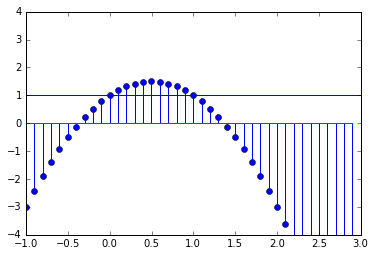

In [99]:
plt = graf_slice(func, res.x, func(res.x))
plt.ylim(-4,4)
print 'c1:', c1(res.x), 'c2:', c2(res.x)

Ahora con restricciones

In [96]:
res = minimize(func, [-1.0,1.0], args=(-1.0,), jac=func_deriv,
                constraints=cons, method='SLSQP', options={'disp': True})
print 'minimo at x=', res.x, 'f(x)=', func(res.x)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -1.00000018311
            Iterations: 9
            Function evaluations: 14
            Gradient evaluations: 9
minimo at x= [ 1.00000009  1.        ] f(x)= 1.00000018311


(-4, 4)

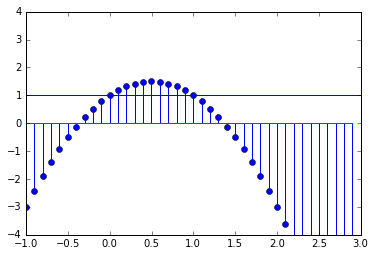

In [97]:
plt = graf_slice(func, res.x, func(res.x))
plt.ylim(-4,4)

In [34]:
A = np.random.randint(100, size=8).reshape((2,2,2))
print A
B = A.reshape(-1)
print B
B.reshape((2,2,2))

[[[28  0]
  [79 58]]

 [[87 52]
  [70 95]]]
[28  0 79 58 87 52 70 95]


array([[[28,  0],
        [79, 58]],

       [[87, 52],
        [70, 95]]])

In [110]:
#vhr=10*10*10
#vlr=5*5*5
#bval=6


def gfun2(x, y, G, bval):
    vhr, vlr  = G.shape
    Yhr = x.reshape((vhr, bval))
    Ylr = y.reshape((vlr, bval))
    return np.linalg.norm(G.dot(Ylr)-Yhr)**2


def gfun(x, y, G, bval):
    vlr, vhr = G.shape
    Yhr = x.reshape((vhr, bval))
    Ylr = y.reshape((vlr, bval))
    return np.linalg.norm(G.dot(Yhr)-Ylr)**2

def ggrad(x, y, G, bval):
    vlr, vhr = G.shape
    Yhr = x.reshape((vhr, bval))
    Ylr = y.reshape((vlr, bval))
    nabla = 2*(G.T.dot(G.dot(Yhr)-Ylr))
    return nabla.reshape(-1)
    
def _gfun(x, y, vlr, vhr, bval,lr_shape, hr_shape):
    Yhr = x.reshape((vhr, bval))
    G_Yhr = img_utils.downsampling2(Yhr.reshape(hr_shape),2).reshape((vlr, bval))
    Ylr = y.reshape((vlr, bval))
    return np.linalg.norm(G_Yhr-Ylr)**2
 

def _ggrad(x, y, vlr, vhr, bval, lr_shape, hr_shape):
    Yhr = x.reshape((vhr, bval))
    G_Ylr = img_utils.downsampling2(Yhr.reshape(hr_shape),2).reshape((vlr,bval))
    
    #(20, 25, 25, 1) --- (13520, 1)
    #print y.shape,'---', (vlr, bval)
    Ylr = y.reshape((vlr, bval))
    nabla = 2*(img_utils.downsampling2((G_Ylr-Ylr).reshape(lr_shape), 0.5)).reshape(hr_shape)
    return nabla.reshape(-1)


In [37]:

G = img_utils.buildDownsamplig(Yhr.shape, 2)
g0 = gfun(Yhr.reshape(-1), Ylr.reshape(-1), G)
nabla0 = gdet(Yhr.reshape(-1), Ylr.reshape(-1), G)

## Agarro una imagen dmri de prueba

In [6]:
from utils.DataGetter import DataGetter
from utils.DownsampledImage import DownsampledImage

/user/lgomez/home/anaconda2/lib/python2.7/site-packages/skimage/filter/__init__.py:6: skimage_deprecation: The `skimage.filter` module has been renamed to `skimage.filters`.  This placeholder module will be removed in v0.13.
  warn(skimage_deprecation('The `skimage.filter` module has been renamed '


In [7]:
d = DataGetter()
datas_names = [
    DataGetter.STANDFORD_HARDI_DATA, #(81, 106, 76, 160)
    #DataGetter.TAIWAN_NTU_DSI_DATA,  #(96, 96, 60, 203)
    #DataGetter.SHERBROOKE_3SHELL_DATA #(128, 128, 60, 193)
]

scale=2
datas = d.get_data(datas_names)
name = datas_names[0]
lr_hr_imgs = DownsampledImage(name, datas[name]['img'], datas[name]['gtab'], scale)

Dataset is already in place. If you want to fetch it again please first remove the folder /user/lgomez/home/.dipy/stanford_hardi 
Dataset is already in place. If you want to fetch it again please first remove the folder /user/lgomez/home/.dipy/stanford_hardi 


(41, 53, 38, 160)

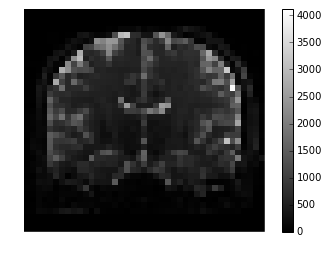

In [10]:
img_hr = lr_hr_imgs.get_hr_img()
img_lr = lr_hr_imgs.get_lr_img()
img_utils._is(img_lr)
img_lr.shape

## Seleccion de pedazo a mejorar resolucion

('pedazo en baja resolucion', (10, 10, 10, 1))

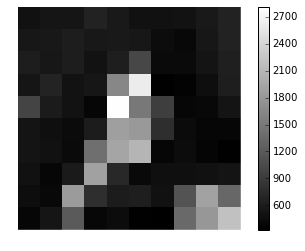

In [14]:
# Uso un pedazo
#i_lr = img_lr[5:25, 5:31, 8:24,:6]
## Funco
i_lr = img_lr[10:20, 15:25, 15:25,:1]
i_hr = img_hr[20:40, 30:50, 30:50,:1]

## No Funco
#i_lr = img_lr[0:20, 0:26, 0:26,:1]
## No Funco
#i_lr = img_lr[0:20, 0:20, 0:20,:1]
## Funco
#i_lr = img_lr[0:14, 0:14, 0:14,:1]
## No Funco
#i_lr = img_lr[0:16, 0:16, 0:16,:1]
## Funco
#i_lr = img_lr[0:16, 5:21, 5:19,:1]

img_utils._is(i_lr)
'pedazo en baja resolucion', i_lr.shape

('pedazo en alta resolucion (objetivo)', (20, 20, 20, 1))

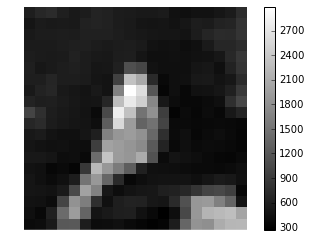

In [15]:
img_utils._is(i_hr)
'pedazo en alta resolucion (objetivo)',i_hr.shape

<module 'matplotlib.pyplot' from '/user/lgomez/home/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

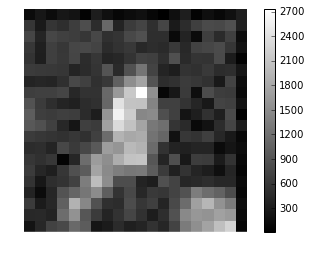

In [94]:
x0_noised = phantom.add_noise(x0, snr=20,noise_type='rician')
x0_noised.min()
img_utils._is(x0_noised)


original rangos: 121 2883 3004
noised rangos: 0.0 3562.08700905 3562.08700905


('downsampleada sin y con ruido', (20, 20, 20, 1))

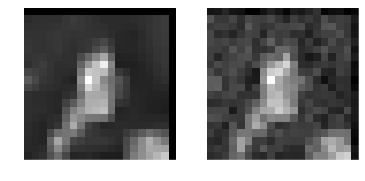

In [56]:
from dipy.sims import phantom

#Le doy un psampleo como x0
x0 = img_utils.downsampling2(i_lr, 0.5).astype(float)
x0_noised = phantom.add_noise(x0, snr=20,noise_type='rician')
#x0_noised = x0_noised - x0_noised.min()
img_utils._isc(x0, x0_noised)
#_is(x0)
print 'original rangos:', i_hr.min(), i_hr.ptp(), i_hr.max()
print 'noised rangos:', x0_noised.min(), x0_noised.ptp(), x0_noised.max()
'downsampleada sin y con ruido', x0_noised.shape

/home/lgomez/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:14: OptimizeWarning: Unknown solver options: factr


Imagen calculada vs pasada como x0 (20, 20, 20, 1)


<module 'matplotlib.pyplot' from '/user/lgomez/home/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

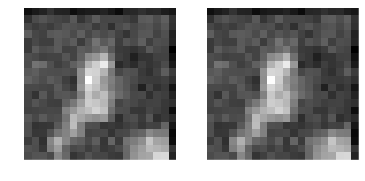

In [38]:
vhr = x0.shape[0]*x0.shape[1]*x0.shape[2]
vlr = vhr/8
bval = x0.shape[3]

#f = lambda x: _gfun(x, i_lr,vlr, vhr, bval, i_lr.shape, x0.shape)
#fg = lambda x: _ggrad(x, i_lr, vlr, vhr, bval, i_lr.shape, x0.shape)

G = img_utils.buildDownsamplig(x0.shape[:3], 2)
f = lambda x: gfun(x, i_lr , G, bval)
fg = lambda x: ggrad(x, i_lr, G, bval)


res = minimize(f, x0_noised.reshape((vhr, bval)), method='L-BFGS-B', #jac=fg,
                options={'disp': 10, 'factr': 10, 'gtol':1e-10, 'maxiter':1000})

A = res.x.reshape((vhr, bval)).reshape(x0.shape)
print 'Imagen calculada vs pasada como x0', A.shape
img_utils._isc(A, x0_noised)

-- el resultado tenia valores negativos --
X0 rangos:  5.47913497765 3161.05153074 3166.53066572 float64
Xf rangos:  0.0 4620.85284991 4620.85284991 float64
error relativo orig~Xf: 319.301307703
error relativo X0~Xf: 0.485834256437
Orig vs Xf vs X0
funcalls= 9


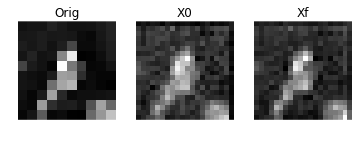

In [118]:


X0 = x0_noised.reshape((vhr, bval))
res = optimize.fmin_l_bfgs_b(f, X0.reshape(-1),fprime=fg, disp=True)
A = res[0].reshape((vhr, bval)).reshape(x0.shape)

min_A = A.min()
if min_A < 0 :
    print '-- el resultado tenia valores negativos --'
    A = A - min_A

img_utils._isc3(i_lr, X0.reshape(x0.shape), A, titles=['Orig', 'X0', 'Xf'])
print 'X0 rangos: ',  X0.min(), X0.ptp(), X0.max(),X0.dtype 
print 'Xf rangos: ',  A.min(), A.ptp(), A.max(), A.dtype
print 'error relativo orig~Xf:', np.linalg.norm(i_hr - A) / (np.linalg.norm(i_hr))
print 'error relativo X0~Xf:', np.linalg.norm(X0.reshape(x0.shape) - A) / (np.linalg.norm(X0))
print 'Orig vs Xf vs X0'
print 'funcalls=', res[2]['funcalls']

<module 'matplotlib.pyplot' from '/user/lgomez/home/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

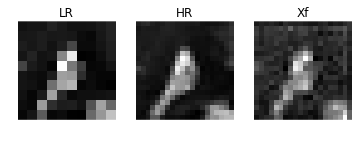

In [119]:
img_utils._isc3(i_lr, i_hr, A, titles=['LR', 'HR', 'Xf'])


X0 rangos:  1.0 0.0 1.0 float64
Xf rangos:  241.0 2727.0 2968.0 float64
error relativo orig~Xf: 229.097801242
error relativo X0~Xf: 790.379748602
Orig vs Xf vs X0
funcalls= 13
(10, 10, 10, 1) (20, 20, 20, 1)


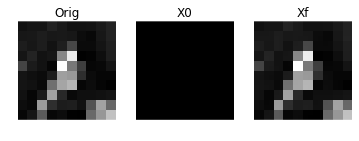

In [117]:

X0 = x0_noised.reshape((vhr, bval))
X0 = np.ones((vhr, bval), dtype=float)
res = optimize.fmin_l_bfgs_b(f, X0.reshape(-1), fprime=fg, disp=True, factr=1e-15,  pgtol=1e-40)
A = res[0].reshape((vhr, bval)).reshape(x0.shape)

min_A = A.min()
if min_A < 0 :
    print '-- el resultado tenia valores negativos --'
    A = A - min_A

img_utils._isc3(i_lr, X0.reshape(x0.shape), A, titles=['Orig', 'X0', 'Xf'])
print 'X0 rangos: ',  X0.min(), X0.ptp(), X0.max(),X0.dtype 
print 'Xf rangos: ',  A.min(), A.ptp(), A.max(), A.dtype
print 'error relativo orig~Xf:', np.linalg.norm(i_hr - A) / (np.linalg.norm(i_hr))
print 'error relativo X0~Xf:', np.linalg.norm(X0.reshape(x0.shape) - A) / (np.linalg.norm(X0))
print 'Orig vs Xf vs X0'
print 'funcalls=', res[2]['funcalls']
print i_lr.shape, x0.shape


In [114]:
from scipy import sparse

In [113]:
sparse.linalg.G

  (0, 0)	0.125
  (0, 1)	0.125
  (0, 20)	0.125
  (0, 21)	0.125
  (0, 400)	0.125
  (0, 401)	0.125
  (0, 420)	0.125
  (0, 421)	0.125
  (1, 2)	0.125
  (1, 3)	0.125
  (1, 22)	0.125
  (1, 23)	0.125
  (1, 402)	0.125
  (1, 403)	0.125
  (1, 422)	0.125
  (1, 423)	0.125
  (2, 4)	0.125
  (2, 5)	0.125
  (2, 24)	0.125
  (2, 25)	0.125
  (2, 404)	0.125
  (2, 405)	0.125
  (2, 424)	0.125
  (2, 425)	0.125
  (3, 6)	0.125
  (3, 7)	0.125
  (3, 26)	0.125
  (3, 27)	0.125
  (3, 406)	0.125
  (3, 407)	0.125
  (3, 426)	0.125
  (3, 427)	0.125
  (4, 8)	0.125
  (4, 9)	0.125
  (4, 28)	0.125
  (4, 29)	0.125
  (4, 408)	0.125
  (4, 409)	0.125
  (4, 428)	0.125
  (4, 429)	0.125
  (5, 10)	0.125
  (5, 11)	0.125
  (5, 30)	0.125
  (5, 31)	0.125
  (5, 410)	0.125
  (5, 411)	0.125
  (5, 430)	0.125
  (5, 431)	0.125
  (6, 12)	0.125
  (6, 13)	0.125
  (6, 32)	0.125
  (6, 33)	0.125
  (6, 412)	0.125
  (6, 413)	0.125
  (6, 432)	0.125
  (6, 433)	0.125
  (7, 14)	0.125
  (7, 15)	0.125
  (7, 34)	0.125
  (7, 35)	0.125
  (7, 414)	0.125
  (7,

In [86]:
print res[1:]
print res[2]['funcalls']


(624682506.70998502, {'warnflag': 1, 'task': 'STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT', 'grad': array([-166.89300537, -166.89300537, -178.81393433, ..., -107.2883606 ,
       -143.05114746, -143.05114746]), 'nit': 0, 'funcalls': 16002})
16002


In [77]:
dir(res)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__getslice__',
 '__gt__',
 '__hash__',
 '__init__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'count',
 'index']

((20, 20, 20), 2270.6558592728225)

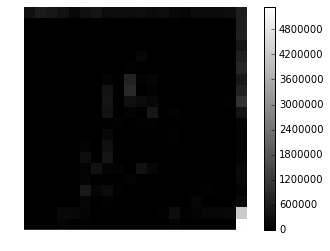

In [12]:

#_is(A)
#_is(x0)
ecm = ((A-i_hr)**2).mean(axis=3)
plt = _is(ecm)
#plt.clim(np.max(ecm))
ecm.shape, np.linalg.norm(x0_noised-A)

In [14]:
np.linalg.norm(x0-A), np.linalg.norm(x0-A)/np.linalg.norm(A),  

(4001.8604462487197, 0.063231390047157013)